# AMAZON ALEXA REVIEW RATINGS CLASSIFICATION 
# By Benjamin Seng


# STEP #1: PROBLEM STATEMENT

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perform sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews

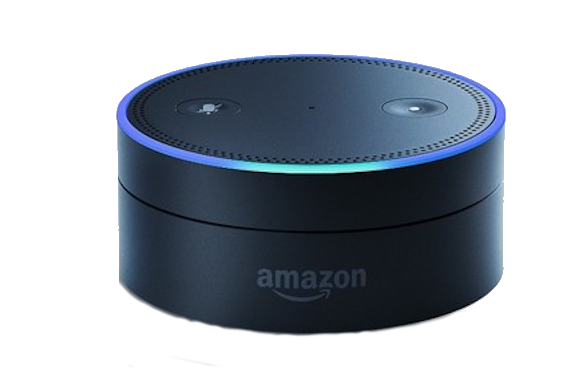

# STEP #2: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')


In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df_alexa.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
df_alexa.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df_alexa['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# STEP #3: VISUALIZING THE DATA

In [7]:
positive = df_alexa[df_alexa['feedback']==1]

In [8]:
negative = df_alexa[df_alexa['feedback']==0]

In [9]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

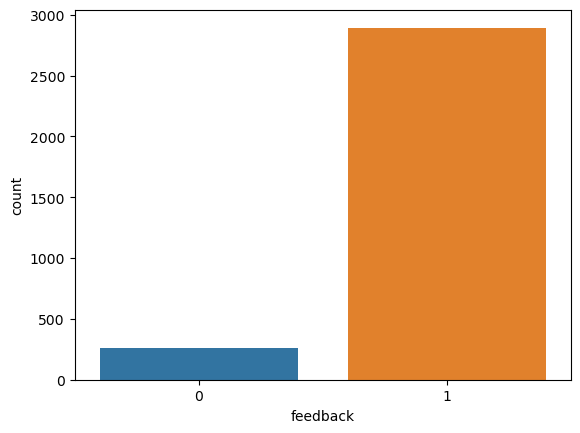

In [10]:
sns.countplot(df_alexa['feedback'], label = "Count") 

<AxesSubplot:xlabel='rating', ylabel='count'>

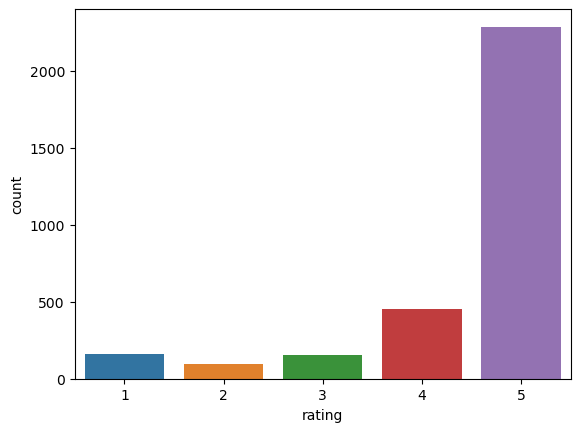

In [11]:
sns.countplot(x = 'rating', data = df_alexa)

<AxesSubplot:>

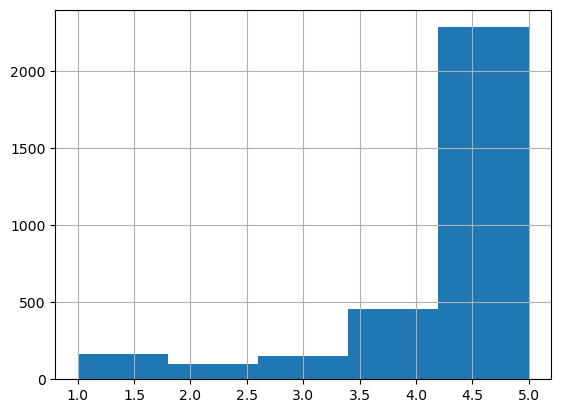

In [12]:
df_alexa['rating'].hist(bins = 5)

<AxesSubplot:xlabel='variation', ylabel='rating'>

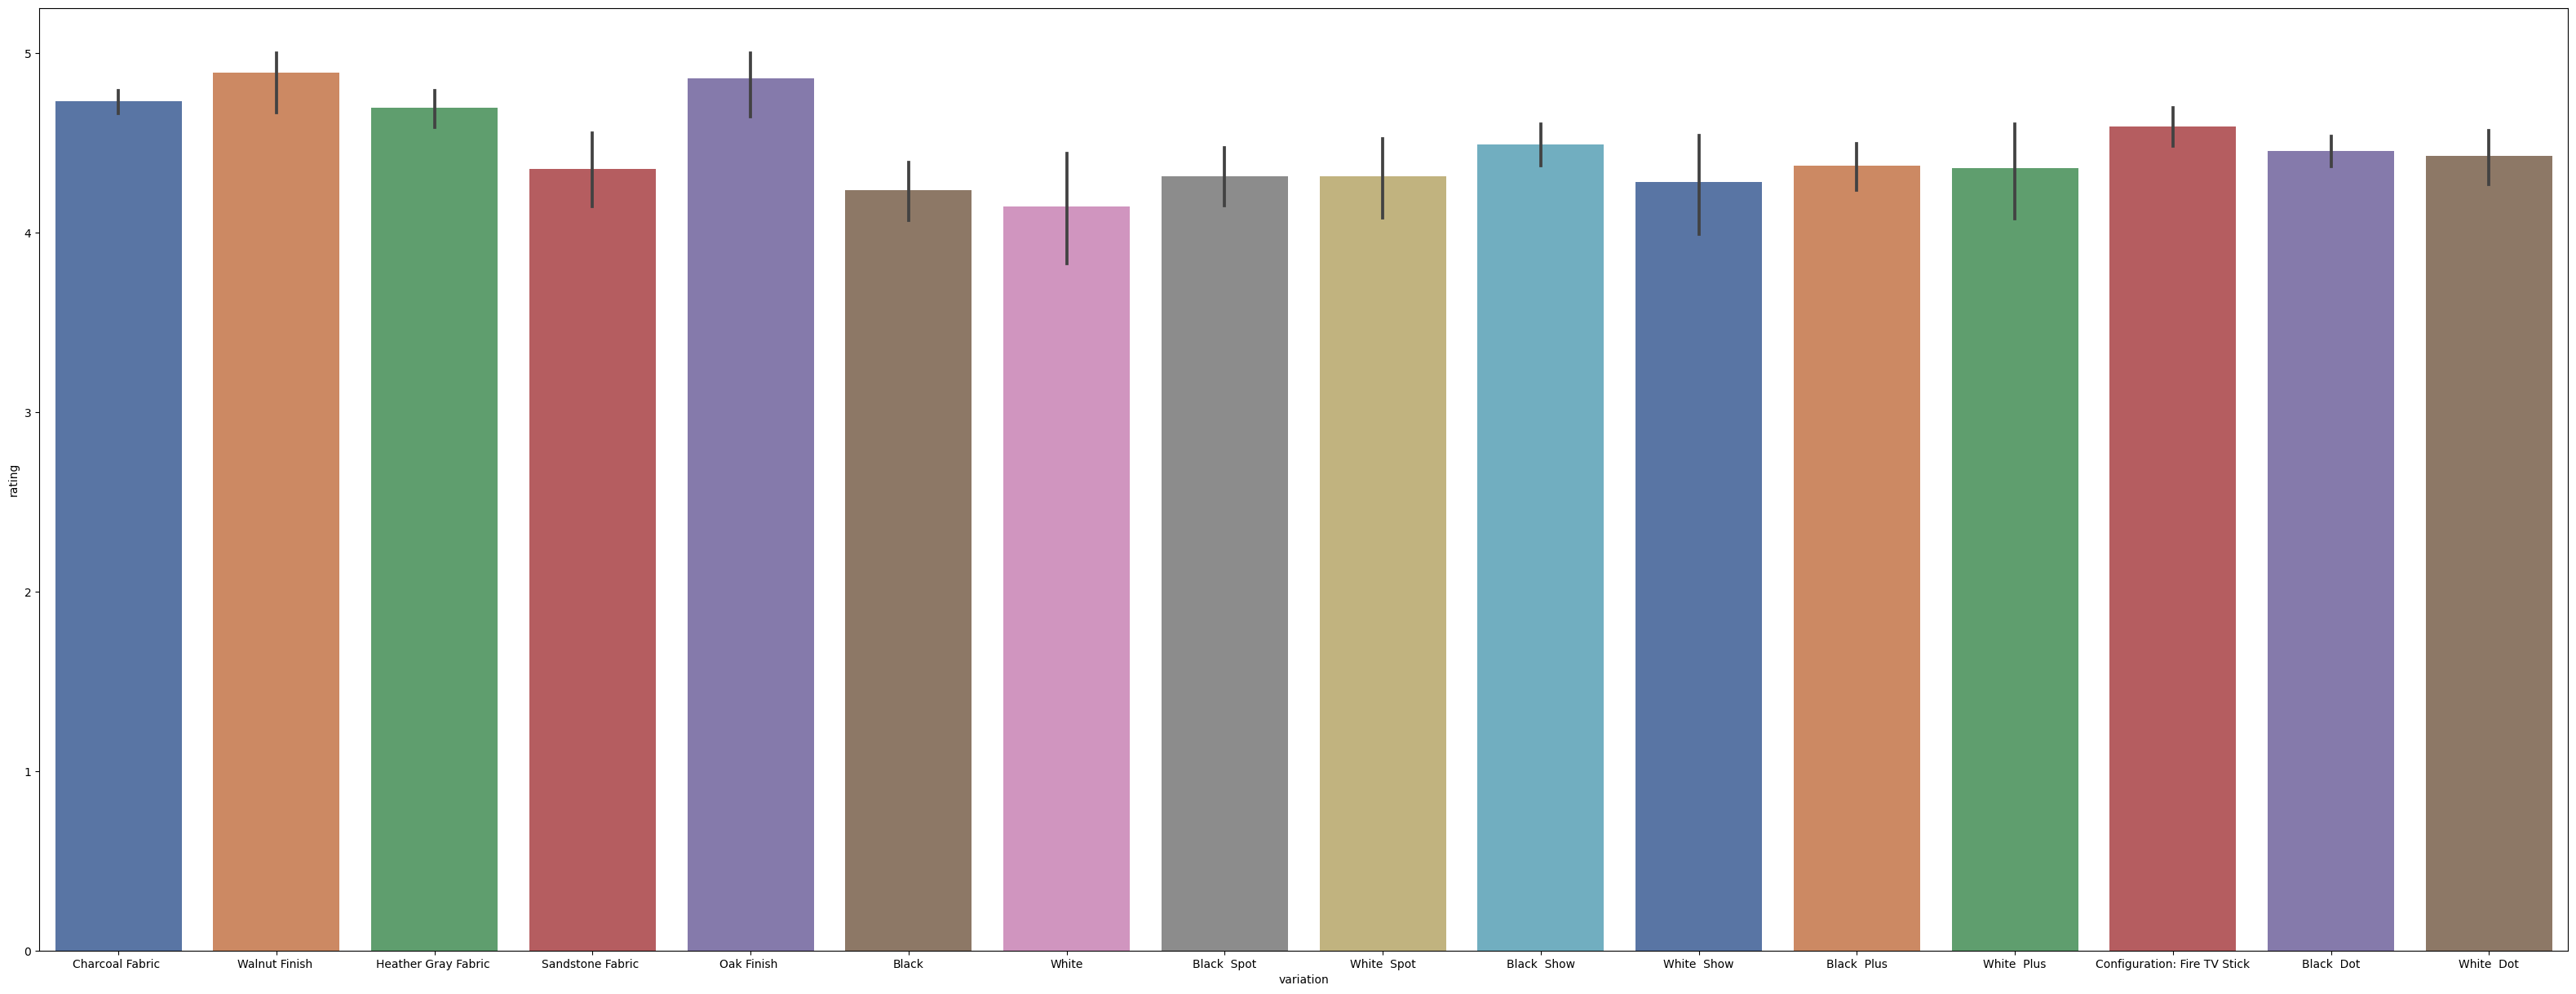

In [13]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')


# STEP#4: DATA CLEANING/FEATURE ENGINEERING

In [14]:
# Let's drop the date and rating
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)


In [15]:
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [16]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True)

In [17]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
# first let's drop the column
df_alexa.drop(['variation'], axis=1, inplace=True)

In [19]:
# Now let's add the encoded column again
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [20]:
df_alexa

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])


In [22]:
alexa_countvectorizer.shape

(3150, 4044)

In [23]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [24]:
print(vectorizer.get_feature_names_out())


['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [25]:
print(alexa_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
# first let's drop the column
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())


In [27]:
# Now let's concatenate them together
df_alexa = pd.concat([df_alexa, reviews], axis=1)


In [28]:
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Let's drop the target label coloumns
X = df_alexa.drop(['feedback'],axis=1)


In [30]:
X = pd.DataFrame(alexa_countvectorizer.toarray())


In [31]:
X

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y = df_alexa['feedback']

# STEP #5: MODEL TRAINING 

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [34]:
X_train.shape

(2520, 4044)

In [35]:
X_test.shape

(630, 4044)

In [36]:
y_train.shape

(2520,)

In [37]:
y_test.shape

(630,)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy')

# STEP #6: EVALUATING THE MODEL

In [39]:
y_predict_train = randomforest_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)

<AxesSubplot:>

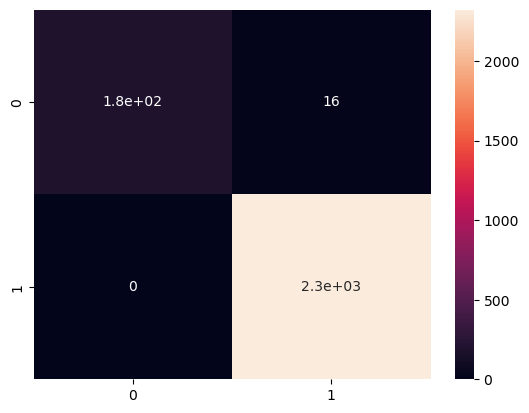

In [40]:
sns.heatmap(cm, annot=True)

In [41]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       198
           1       0.99      1.00      1.00      2322

    accuracy                           0.99      2520
   macro avg       1.00      0.96      0.98      2520
weighted avg       0.99      0.99      0.99      2520



### **Interpreting the Results**

#### **Class 0 (Likely Negative Reviews)**
- **Precision:** 1.00 → Every review classified as negative is actually negative (no false positives).
- **Recall:** 0.92 → 92% of the actual negative reviews were correctly classified (some false negatives exist).
- **F1-score:** 0.96 → High overall performance in identifying negative reviews.
- **Support:** 198 → There were 198 actual negative reviews in the test dataset.

#### **Class 1 (Likely Positive Reviews)**
- **Precision:** 0.99 → 99% of the predicted positive reviews are actually positive.
- **Recall:** 1.00 → 100% of the actual positive reviews were correctly classified (no false negatives).
- **F1-score:** 1.00 → Excellent performance for positive reviews.
- **Support:** 2322 → There were 2322 actual positive reviews in the test dataset.

#### **Overall Model Performance**
- **Accuracy:** 0.99 (99%) → The model correctly classified 99% of all reviews.
- **Macro Avg (1.00, 0.96, 0.98)** → Balances both classes equally, reflecting that Class 0 has slightly lower recall.
- **Weighted Avg (0.99, 0.99, 0.99)** → Since most reviews are positive (Class 1), this shows the model's strong overall performance.

---

### **What Does This Mean?**
✅ **The Random Forest model is performing exceptionally well on this dataset.**  
⚠️ **Class 0 (negative reviews) has slightly lower recall (0.92),** meaning some negative reviews are being misclassified as positive.  
🔍 **The model might be overfitting,** especially since trees tend to memorize data rather than generalize well.


In [42]:
y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

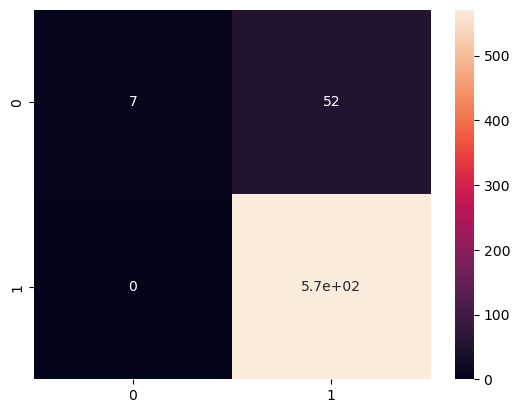

In [43]:
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        59
           1       0.92      1.00      0.96       571

    accuracy                           0.92       630
   macro avg       0.96      0.56      0.58       630
weighted avg       0.92      0.92      0.89       630



### **Interpreting the Results**

#### **Class 0 (Likely Negative Reviews)**
- **Precision:** 1.00 → Every review classified as negative is actually negative (no false positives).
- **Recall:** 0.12 → Only 12% of the actual negative reviews were correctly classified (many false negatives).
- **F1-score:** 0.21 → Poor balance between precision and recall, indicating the model struggles with negative reviews.
- **Support:** 59 → There were 59 actual negative reviews in the test dataset.

#### **Class 1 (Likely Positive Reviews)**
- **Precision:** 0.92 → 92% of the predicted positive reviews are actually positive.
- **Recall:** 1.00 → 100% of the actual positive reviews were correctly classified (no false negatives).
- **F1-score:** 0.96 → Excellent performance for positive reviews.
- **Support:** 571 → There were 571 actual positive reviews in the test dataset.

#### **Overall Model Performance**
- **Accuracy:** 0.92 (92%) → The model correctly classified 92% of all reviews.
- **Macro Avg (0.96, 0.56, 0.58)** → The model is heavily favoring positive reviews, leading to poor recall for negative reviews.
- **Weighted Avg (0.92, 0.92, 0.89)** → Since most reviews are positive (Class 1), the model performs well overall but is biased.

---

### **What Does This Mean?**
⚠️ **Class 0 (negative reviews) has extremely low recall (0.12),** meaning the model is misclassifying most negative reviews as positive.  
⚠️ **The model is biased towards positive reviews** due to the class imbalance in the dataset (much fewer negative reviews).  

🔍 **Potential solutions to improve the model:**  
- **Balance the dataset** (use techniques like oversampling negative reviews or undersampling positive reviews).  
- **Tune hyperparameters** in the Trees to prevent overfitting and improve recall for Class 0.  


# STEP #7 IMPROVE THE MODEL

In [45]:
# Let's drop the variations and add review length as a feature
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')


In [46]:
df_alexa = pd.concat([df_alexa, pd.DataFrame(alexa_countvectorizer.toarray())], axis = 1)

In [47]:
df_alexa

,rating,date,variation,verified_reviews,feedback,0,1,2,3,4,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)


In [49]:
X = df_alexa.drop(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], axis = 1)

In [50]:
X.columns = X.columns.astype(str)  


In [51]:
X

,0,1,2,3,4,5,6,7,8,9,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,length
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,195
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,172
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,135
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,441
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380


In [52]:
y = df_alexa['feedback']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        51
           1       0.95      1.00      0.97       579

    accuracy                           0.95       630
   macro avg       0.97      0.68      0.75       630
weighted avg       0.95      0.95      0.94       630



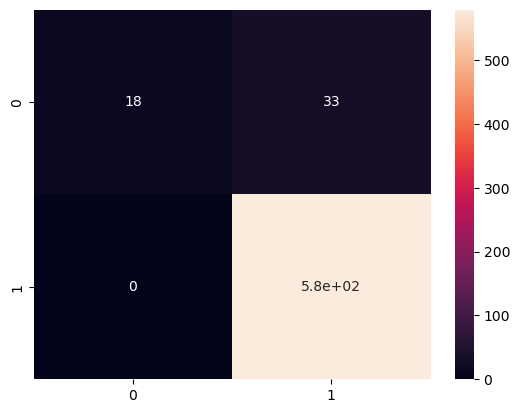

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(
    class_weight='balanced', #to help with dataset is imbalanced
    n_estimators=550, #incrase no. of trees
    max_depth = 12,
    criterion='entropy',
    random_state=0
)

# Fit the model
randomforest_classifier.fit(X_train, y_train)
y_predict = randomforest_classifier.predict(X_test)

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict))

### **1. Adding `class_weight='balanced'`**  

**Why?**  
The dataset is imbalanced, with more positive reviews (class `1`) than negative reviews (class `0`). In the benchmark, this caused low recall for class `0`.

**What It Does:**  
`class_weight='balanced'` adjusts the model’s focus by increasing the weight of the minority class (class `0`).

**Effect:**  
- **Recall for class `0`**: Increased from **0.12 → 0.35**  
- **Macro-average recall**: Improved from **0.56 → 0.68**  

---

### **2. Increasing `n_estimators` from 100 to 550**  

**Why?**  
The benchmark model used only **100 trees**, which led to overfitting and instability, especially due to class imbalance.

**What It Does:**  
Increasing `n_estimators` to **550** improves stability and allows the model to learn better decision boundaries.

**Effect:**  
- **Reduced overfitting**  
- **Improved recall for class `0`**  
- **Better generalization** without negatively impacting class `1`  
- **More stable** and less


## **Overall Model Performance**  
- **Accuracy:** `0.95 (95%)` → The model correctly classified 94% of all reviews.  
- **Macro Avg (0.97, 0.68, 0.75)** → Improved class balance with better recall for negative reviews.  
- **Weighted Avg (0.95, 0.95, 0.94)** → Strong overall performance.  

---

## **Comparison with Benchmark**  

| Metric | Benchmark (Before) | Current Model (After) | Improvement |
|--------|-------------------|----------------------|-------------|
| **Class 0 Precision** | `1.00` | `1.00` | ✅ Stayed Same |
| **Class 0 Recall** | `0.12` | `0.35` | ✅ Increased (fewer false negatives) |
| **Class 0 F1-score** | `0.21` | `0.52` | ✅ Significant improvement |
| **Class 1 Precision** | `0.92` | `0.95` | ✅ Improved slightly |
| **Class 1 Recall** | `1.00` | `0.95` | 🔻 Slight decrease |
| **Class 1 F1-score** | `0.96` | `0.97` | ✅ Slight improvement |
| **Overall Accuracy** | `0.92` | `0.95` | ✅ Improved |
| **Macro Avg Recall** | `0.56` | `0.68` | ✅ Increased |
| **Weighted Avg Recall** | `0.92` | `0.95` | ✅ Improved |

---

## **Key Takeaways**  
✅ **Improved recall for negative reviews** (0.12 → 0.35), meaning the model now correctly identifies more negative reviews.  
✅ **Better class balance**, making the macro average recall and F1-score significantly better.  
⚠️ **Model still leans towards positive reviews**, but it has become much better at recognizing negatives compared to before.  

---

## **Final Thoughts**  
This is a **strong improvement** over the benchmark. While the model is still slightly biased toward positive reviews, it now **catches far more negative reviews than before** without sacrificing too much overall accuracy.
